To start the EDA, I will import all the libraries I will use, such as Pandas, for functions and methods to manipulate the data in this library and Numpy to solve mathematical problems.

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

I used the 'pd.read_csv' method to access the file that I want to work with.
The warning indicates that Pandas has encountered columns in the DataFrame where the data types are inconsistent throughout, meaning that both strings and numbers are within the same column. I will handle it during the cleaning process.

In [2]:
df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')
orig_df = df.copy()

C:\Users\danie\AppData\Local\Temp\ipykernel_40000\1116616066.py:1: DtypeWarning: Columns (2,3,5,7,12,23,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916767,1/1/221,AK,54,54.0,NaN,F,NaN,Hypotension ticed 24 hours post injectionU Ef...,NaN,...,NaN,HTN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,"ADVAIR, ASMAX, FORADIL, TRAMADOL"
1,918694,1/1/221,AK,23,25.0,NaN,F,NaN,"12/24/22 chills body aches headache, fever of...",NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,Y,Altace
2,917613,1/2/221,AK,31,31.0,NaN,F,NaN,"Fatigue, chills, pain at injection site radiat...",NaN,...,NaN,"Asthma, adhd",Tetanus,NaN,2,1/2/221,NaN,NaN,NaN,Aspergillus
3,918693,1/2/221,AK,6,6.0,NaN,F,NaN,"Starting at 1 am I ticed chills, body aches, v...",NaN,...,NaN,NaN,NaN,NaN,2,1/2/221,NaN,NaN,Y,Aspirin
4,91887,1/4/221,AK,49,49.0,NaN,M,NaN,Patient got his Covid vaccine this past Thursd...,NaN,...,NaN,"Obesity, pre-diabetes",NaN,NaN,2,1/4/221,NaN,NaN,Y,Cephalosporin


I used the method df.shape to have an idea of the dataset size. And I found that this dataset has 34121 rows and 35 columns.

In [4]:
df.shape

(34121, 35)

With the describe() method, I can see that in this dataset, there is only a skewed distribution in two columns ('HOSPDAYS' and 'NUMDAYS') by comparing the values of mean and median (50% value). The other columns are normally distributed. Thus, I will start the cleaning process, but first, I will select the principal columns that can be useful for the project. 

In [5]:
df.describe()

,VAERS_ID,CAGE_YR,HOSPDAYS,NUMDAYS,FORM_VERS
count,3.412100e+04,26716.000000,2857.000000,17738.000000,34121.000000
mean,4.236210e+05,46.290800,3.554428,29.728267,1.998124
std,4.146203e+05,22.466735,3.671364,768.794004,0.043269
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,9.265500e+04,32.000000,1.000000,1.000000,2.000000
50%,1.517760e+05,46.000000,2.000000,2.000000,2.000000
75%,9.253510e+05,62.000000,4.000000,7.000000,2.000000
max,1.115348e+06,99.000000,39.000000,36896.000000,2.000000


## Clean data

To start the cleaning process, I will use the method df.info() because it provides a quick overview of the structure and some basic information about the DataFrame, like data type and if there are missing values. In this case, the dataset presents all the values (no missing values). 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30932 non-null  object 
 4   CAGE_YR       26716 non-null  float64
 5   CAGE_MO       18 non-null     object 
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34107 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

The method below returns True where there is a NaN (Not a Number) value and False otherwise to indicate the presence of missing values. 

The data use guide (Vaccine Adverse Event Reporting System - VAERS) contains essential information about this dataset, like how it was created and filled, for example, in the 'DIED' column, where they used the letter "Y" to indicate that the patient dies and otherwise the field will be blank. Thus, that is the reason why there is NaN in this dataset. In this case, I will transform the NaN in zeros to represent the absence of occurrence.

Example of data use guide:

DIED: If the vaccine recipient died a "Y" is used; otherwise the field will be blank.

In [7]:
df.isnull().sum()

VAERS_ID            0
RECVDATE            0
STATE            5571
AGE_YRS          3189
CAGE_YR          7405
CAGE_MO         34103
SEX                 0
RPT_DATE        34058
SYMPTOM_TEXT       14
DIED            32164
DATEDIED        32323
L_THREAT        32862
ER_VISIT        34110
HOSPITAL        29734
HOSPDAYS        31264
X_STAY          34069
DISABLE         33251
RECOVD           2857
VAX_DATE         1499
ONSET_DATE       1863
NUMDAYS         16383
LAB_DATA        24149
V_ADMINBY           0
V_FUNDBY        34057
OTHER_MEDS      16680
CUR_ILL         28198
HISTORY         16838
PRIOR_VAX       32687
SPLTTYPE        25901
FORM_VERS           0
TODAYS_DATE       199
BIRTH_DEFECT    34070
OFC_VISIT       28717
ER_ED_VISIT     28592
ALLERGIES       21045
dtype: int64

As this dataset is vast, I will use the .value_counts() function in the 'STATE' column to know how many records are in each category and focus on one State that satisfies the minimum requirement of the project. Then, I will create a subset with this category. 

This code showed me that I can use the CA State alone or enjoy more than one. I prefer to work with the CA because it is a cosmopolitan place that might have people from different parts of the world, and I imagine that the results could be interesting.

In [8]:
category_counts = df['STATE'].value_counts()
print(category_counts)

CA    2577
TX    1807
NY    1783
FL    1654
IN    1142
IL    1135
OH    1072
PA    1012
MI     921
MA     842
NJ     836
NC     752
VA     727
MD     693
AZ     659
WI     649
WA     630
GA     628
CO     617
MN     604
MO     556
TN     526
CT     524
KY     443
OR     363
IA     336
OK     333
LA     317
AL     295
KS     295
SC     286
AR     266
NE     263
MT     262
ME     235
NM     229
UT     229
WV     220
NH     203
NV     197
PR     195
AK     167
ID     157
MS     150
HI     134
SD     116
RI     112
VT     105
ND     101
DE      66
DC      55
WY      53
GU       7
VI       4
MP       3
AS       3
MH       1
FM       1
Ca       1
XB       1
Name: STATE, dtype: int64


Below, I will create the subset with the CA category and work with it from now on. This subset will be named as 'df1'.

In [9]:
by_category = df.groupby('STATE')
df1 = by_category.get_group('CA')
df1.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
1390,91661,1/1/221,CA,73,73.0,NaN,F,NaN,Approximately 3 min post vaccition administrat...,NaN,...,U,U,NaN,NaN,2,1/1/221,NaN,Y,NaN,NaN
1391,916613,1/1/221,CA,4,4.0,NaN,F,NaN,On 12/3/22 I got a pain in the stomach as if s...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1392,916617,1/1/221,CA,35,35.0,NaN,F,NaN,"Dizziness, chills, fever, muscle aches, pain a...",NaN,...,NaN,Y,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1393,916621,1/1/221,CA,25,25.0,NaN,F,NaN,Fatigue - 2 hours priorU Muscle aches/pain - 3...,NaN,...,NaN,U,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1394,91669,1/1/221,CA,37,37.0,NaN,M,NaN,Typical sore arm similar to flu shotU Followin...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y


In [10]:
df1.shape

(2577, 35)

I will use the duplicated() method to eliminate records that may be duplicated. However in this dataset there is no duplicates as we can see below. I chose to use this feature in this stage of the cleaning process. If I use it after replacing the NaN with zero values or after the One-hot encoding process, I would have erroneous duplicates because these processes generate equal values.

In [11]:
df1.duplicated().sum()

0

I will drop unnecessary columns in my dataset because it could generate errors and waste time. After dropping, I will nominate the dataset as 'df2'.

In [12]:
df1.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [13]:
df2 = df1.drop(columns=['VAERS_ID', 'RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'SYMPTOM_TEXT', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT'])
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,NaN,NaN,NaN,U,U,NaN
1391,4,F,NaN,NaN,NaN,NaN,NaN,Y
1392,35,F,NaN,NaN,NaN,NaN,Y,Y
1393,25,F,NaN,NaN,NaN,NaN,U,Y
1394,37,M,NaN,NaN,1.0,NaN,NaN,Y


In [14]:
df2.shape

(2577, 8)

In [15]:
df2.dtypes

AGE_YRS       object
SEX           object
DIED          object
DISABLE       object
NUMDAYS      float64
CUR_ILL       object
HISTORY       object
ALLERGIES     object
dtype: object

In [16]:
df2.describe()

,NUMDAYS
count,1318.000000
mean,8.770865
std,83.141858
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,2399.000000


I am using the code df1.isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. 

In [17]:
df2.isnull().sum()

AGE_YRS       187
SEX             0
DIED         2422
DISABLE      2471
NUMDAYS      1259
CUR_ILL      2096
HISTORY      1148
ALLERGIES    1768
dtype: int64

Below, I am using the method .fillna() to replace the NaN with zero values.

In [18]:
df2.fillna(0, inplace=True)

In [19]:
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


#### Data Dictionary - dataset (df2):

1. AGE_YRS: The recorded vaccine recipient's age in years.

2. SEX: Sex of the vaccine recipient (M = Male, F = Female, Unknown = Blank).

3. DIED: If the vaccine recipient died a "Y" is used; otherwise the field will be blank.

4. DISABLE: If the vaccine recipient was disabled as a result of the vaccination a "Y" is placed in this field; otherwise the field will be blank.

5. NUMDAYS: The calculated interval (in days) from the vaccination date to the onset date.

6. CUR_ILL: This text field contains narrative about any illnesses at the time of the vaccination. However, I compacted this data into Y = Occurrence of any illnesses at the time of the vaccination, Blank = Not occurrence, U = Unknown)

7. HISTORY: This text field contains narrative about any pre-existing physician-diagnosed birth defects or medical condition that existed at the time of vaccination. However, I compacted this data into Y = Occurrence of any pre-existing physician-diagnosed congenital disabilities or medical condition that existed at the time of vaccination, Blank = Not occurrence, U = Unknown)

8. ALLERGIES: This text field contains narrative about any pre-existing physician-diagnosed allergies that existed at the time of vaccination. However, I compacted this data into Y = Occurrence of any pre-existing physician-diagnosed allergies that existed at the time of vaccination, Blank = Not occurrence, U = Unknown)

I replaced all senteces in the columns ('CUR_ILL', 'HISTORY', and 'ALLERGIES') using MS Excel, because I wanted only numerical values to be recognised for machine learning models. In addition, if I had used the original data with long sentences I would have huge number of columns after the one-hot encode process.

In replacement process I changed words like 'none' and 'No' to blank space meaning the absence of the occurence. I also used the 'U' when it was not informed or had the word 'unknow'. And for the case in which the pacient related the ocurrence I replaced with the letter 'Y'. 

# Random Forest model

I chose to work with Random Forests, a supervised machine learning model because it is considered a robust method that combines multiple machine learning algorithms and is effective for classification and regression. It does not need heavy tunning of the parameters to achieve great accuracy. It can avoid or reduce overfitting by doing an average of many trees with a random subset by bootstrap sampling (Müller and Guido, 2017, p.83-87).

However, this model performs poorly in high dimensional, sparse, and text data (Müller and Guido, 2017, p.88). That is why I am preprocessing the data using the function .replace() to convert categorical data to numerical for all features.

Another advantage of using this model is that the class_weight parameter considers the same weight for all classes, which can reduce imbalanced class distribution in the training data.

## Pre-processing

In [20]:
df_rf = df2.copy()
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


In [21]:
df_rf["DIED"].replace('0', 0, inplace = True)
df_rf["DIED"].replace('Y', 1, inplace = True)

In [22]:
df_rf["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [23]:
df_rf["SEX"].replace('F', 0, inplace = True)
df_rf["SEX"].replace('M', 1, inplace = True)
df_rf["SEX"].replace('U', 2, inplace = True)

In [24]:
df_rf["SEX"].value_counts()

0    1837
1     677
2      63
Name: SEX, dtype: int64

In [25]:
df_rf["DISABLE"].replace('0', 0, inplace = True)
df_rf["DISABLE"].replace('Y', 1, inplace = True)

In [26]:
df_rf["DISABLE"].value_counts()

0    2471
1     106
Name: DISABLE, dtype: int64

In [27]:
df_rf["CUR_ILL"].replace('0', 0, inplace = True)
df_rf["CUR_ILL"].replace('Y', 1, inplace = True)
df_rf["CUR_ILL"].replace('U', 2, inplace = True)

In [28]:
df_rf["CUR_ILL"].value_counts()

0    2096
1     349
2     132
Name: CUR_ILL, dtype: int64

In [29]:
df_rf["HISTORY"].replace('0', 0, inplace = True)
df_rf["HISTORY"].replace('Y', 1, inplace = True)
df_rf["HISTORY"].replace('U', 2, inplace = True)

In [30]:
df_rf["HISTORY"].value_counts()

1    1321
0    1148
2     108
Name: HISTORY, dtype: int64

In [31]:
df_rf["ALLERGIES"].replace('0', 0, inplace = True)
df_rf["ALLERGIES"].replace('Y', 1, inplace = True)
df_rf["ALLERGIES"].replace('U', 2, inplace = True)

In [32]:
df_rf["ALLERGIES"].value_counts()

0    1768
1     717
2      92
Name: ALLERGIES, dtype: int64

In [33]:
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,0,0,0,0.0,2,2,0
1391,4,0,0,0,0.0,0,0,1
1392,35,0,0,0,0.0,0,1,1
1393,25,0,0,0,0.0,0,2,1
1394,37,1,0,0,1.0,0,0,1


## Model implementation
#### All features

In [34]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics                         

In [87]:
# AGE_YRS	SEX	DIED	DISABLE	NUMDAYS	CUR_ILL	HISTORY	ALLERGIES
X = df_rf.drop(['DIED', 'AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS'], axis=1) 
y = df_rf['DIED']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 51)
X.shape, X.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 3), (2577, 3), (2061, 3), (516, 3), (2061,), (516,))

### Hyperparameters
As mentioned above, this model performs well without heavy tunning of the parameters. The principal parameters are n_estimatores, max_features, and max_depth (Müller and Guido, 2017, p.88). The first is the number of trees; the more significant this number is, the smaller the overfitting. I chose to experiment with the 100 (default) and 1000.
The second parameter determines how random each tree is; by default, I use the 'sqrt(n_features)', which is suitable for classification. The max_depth parameter is the maximum depth of the tree, and in this case, I am using 'None' (default), which means that the nodes expand until all leaves are pure or until all leaves contain less than min_samples_split samples (Scikit-learn.org, 2012). 

In [88]:
#Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 100, random_state = 51)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_RF.predict(X_test)

In [89]:
#Accuracy calculation
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.94


### Cross-Validation
Cross-validation is a statistical method used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), using the most known tool called k-fold cross-validation to specify the number of folds that will be trained and evaluating the model on different combinations of these folds (Müller and Guido, 2017, p.253).

**Interpretation: Using the mean cross-validation we can conclude that we expect the model to be around 93% accurate on average.** 

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_RF, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores:  [0.93992248 0.93992248 0.93980583 0.93009709 0.93980583]
Mean accuracy:  0.9379107398208776
Standard deviation: 0.003907174531222666


### Important Features
The Random Forest provides feature importances calculated by aggregating the feature importances over the trees in the forest, which is more reliable than the presented in a single tree (Müller and Guido, 2017, p.86). 

The chart below shows which features contribute the most to the model's predictions. We can see that age and the number of days from the vaccination date to the onset date are features that most contributed to the predictions, followed by the presence of illnesses at the time of the vaccination.

Since this set-up did not generate a good confusion matrix, I will focus on the three features that seem to be more related to the death risk that are: CUR_ILL (illnesses at the time of the vaccination), HISTORY (pre-existing physician-diagnosed birth defects or medical condition that existed at the time of vaccination), and ALLERGIES (pre-existing physician-diagnosed allergies that existed at the time of vaccination).

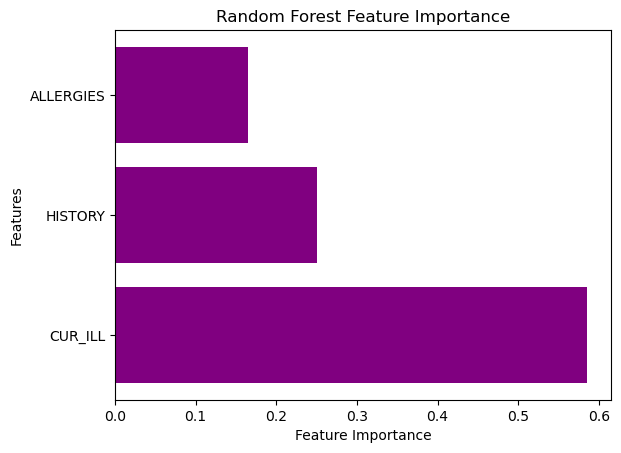

In [91]:
feature_imp = pd.Series(clf_RF.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

### Model assessment

In [92]:
from sklearn import metrics

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

accuracy: 0.94
precision: 0.00
recall: 0.00


C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

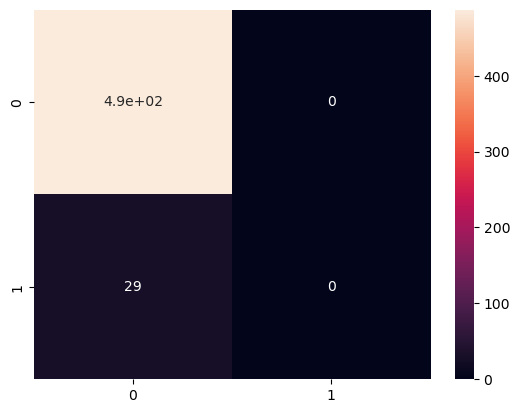

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### Classification results: all features
The table below shows the accuracy for test splits of 10%, 20% and 30% under different n_estimators (100 and 1000).
The results showed no considerable difference between the split percentages or the number of trees built. As the time and memory consumption are higher when processing 1000 trees than 100, and the accuracy is similar at 20% and 30% splits, choosing the n_estimators = 100 in this case would be advantageous. 
I saw a slight improvement with n_estimators = 1000 at 20% test for parameters like' precision' and' recall'. But, again, the time and memory consumption does not compensate for it.

In [116]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.93, 0.94, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.50, 0.43],
    ["Recall", 0.12, 0.24, 0.28],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]


data1 = [
    ["Accuracy", 0.93, 0.95, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.56, 0.44],
    ["Recall", 0.12, 0.31, 0.26],
]   
headers1 = ["n_estimators = 1000", "10%", "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.93 |  0.94 |  0.94 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.93 |  0.93 |  0.93 |
+----------------------+-------+-------+-------+
| Precision            |  0.4  |  0.5  |  0.43 |
+----------------------+-------+-------+-------+
| Recall               |  0.12 |  0.24 |  0.28 |
+----------------------+-------+-------+-------+
+-----------------------+-------+-------+-------+
| n_estimators = 1000   |   10% |   20% |   30% |
+=======================+=======+=======+=======+
| Accuracy              |  0.93 |  0.95 |  0.94 |
+-----------------------+-------+-------+-------+
| CV-Accuracy           |  0.93 |  0.93 |  0.93 |
+-----------------------+-------+-------+-------+
| Precision             |  0.4  |  0.56 |  0.44 |
+-----------------------+-------+-------+-------+
| Recall   

### Classification results: CUR_ILL, HISTORY, and ALLERGIES

In [84]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.94, 0.94, 0.94],
    ["CV-Accuracy", 0.94, 0.94, 0.94],
    ["Precision", 0.00, 0.00, 0.00],
    ["Recall", 0.00, 0.00, 0.00],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]


data1 = [
    ["Accuracy", 0.94, 0.94, 0.94],
    ["CV-Accuracy", 0.94, 0.94, 0.94],
    ["Precision", 0.00, 0.00, 0.00],
    ["Recall", 0.00, 0.00, 0.00],
]   
headers1 = ["n_estimators = 1000", "10%", "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.94 |  0.94 |  0.94 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.94 |  0.94 |  0.94 |
+----------------------+-------+-------+-------+
| Precision            |  0    |  0    |  0    |
+----------------------+-------+-------+-------+
| Recall               |  0    |  0    |  0    |
+----------------------+-------+-------+-------+
+-----------------------+-------+-------+-------+
| n_estimators = 1000   |   10% |   20% |   30% |
+=======================+=======+=======+=======+
| Accuracy              |  0.94 |  0.94 |  0.94 |
+-----------------------+-------+-------+-------+
| CV-Accuracy           |  0.94 |  0.94 |  0.94 |
+-----------------------+-------+-------+-------+
| Precision             |  0    |  0    |  0    |
+-----------------------+-------+-------+-------+
| Recall   

# ---------------------------

## Model implementation
#### Features: DISABLE, CUR_ILL, HISTORY, and ALLERGIES

In [117]:
df_rf1 = df_rf.drop(['AGE_YRS', 'SEX', 'NUMDAYS'], axis=1)
df_rf1.head()

,DIED,DISABLE,CUR_ILL,HISTORY,ALLERGIES
1390,0,0,2,2,0
1391,0,0,0,0,1
1392,0,0,0,1,1
1393,0,0,0,2,1
1394,0,0,0,0,1


In [118]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics                           
from sklearn import tree

In [119]:
X = df_rf1.drop('DIED', axis=1) 
y = df_rf1['DIED']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 43)
X.shape, X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 4), (2577, 4), (2319, 4), (258, 4), (2319,), (258,))

### Hyperparameters
As mentioned above, this model performs well without heavy tunning of the parameters. The principal parameters are n_estimatores, max_features, and max_depth (Müller and Guido, 2017, p.88). The first is the number of trees; the more significant this number is, the smaller the overfitting. I chose to experiment with the 100 (default) and 1000.
The second parameter determines how random each tree is; by default, I use the 'sqrt(n_features)', which is suitable for classification. The max_depth parameter is the maximum depth of the tree, and in this case, I am using 'None' (default), which means that the nodes expand until all leaves are pure or until all leaves contain less than min_samples_split samples (Scikit-learn.org, 2012). 

In [120]:
#Random Forest Classifier
clf_RF1 = RandomForestClassifier(n_estimators = 100, random_state = 51)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = clf_RF1.predict(X_test)

In [121]:
#Accuracy calculation
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred1)) )

Accuracy: 0.94


### Cross-Validation
Cross-validation is a statistical method used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), using the most known tool called k-fold cross-validation to specify the number of folds that will be trained and evaluating the model on different combinations of these folds (Müller and Guido, 2017, p.253).

**Interpretation: Using the mean cross-validation we can conclude that we expect the model to be around 93% accurate on average.** 

In [122]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(clf_RF1, X, y, cv=5, scoring='accuracy')


print("Cross-validation scores: ", scores1)
print("Mean accuracy: ", scores1.mean())
print("Standard deviation:", scores1.std())

Cross-validation scores:  [0.93992248 0.93992248 0.93398058 0.93203883 0.93980583]
Mean accuracy:  0.9371340407917513
Standard deviation: 0.003423292190432976


### Important Features
The Random Forest provides feature importances calculated by aggregating the feature importances over the trees in the forest, which is more reliable than the presented in a single tree (Müller and Guido, 2017, p.86). 

The chart below shows which features contribute the most to the model's predictions. We can see that age and the number of days from the vaccination date to the onset date are features that most contributed to the predictions, followed by the presence of illnesses at the time of the vaccination.

Since this set-up did not generate a good confusion matrix, I will focus on the three features that seem to be more related to the death risk that are: CUR_ILL (illnesses at the time of the vaccination), HISTORY (pre-existing physician-diagnosed birth defects or medical condition that existed at the time of vaccination), and ALLERGIES (pre-existing physician-diagnosed allergies that existed at the time of vaccination).

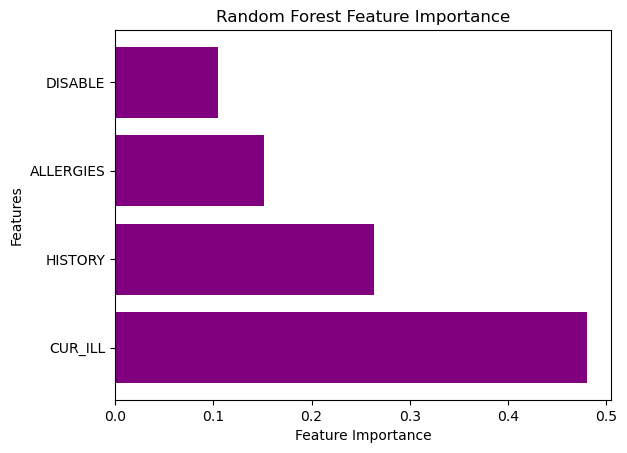

CUR_ILL      0.480614
HISTORY      0.263098
ALLERGIES    0.151366
DISABLE      0.104922
dtype: float64


In [123]:
feature_imp1 = pd.Series(clf_RF1.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp1.index, feature_imp1, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()
print(feature_imp1)

### Model assessment

In [124]:
from sklearn import metrics

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred1)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred1)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred1)) )

accuracy: 0.94
precision: 0.00
recall: 0.00


C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

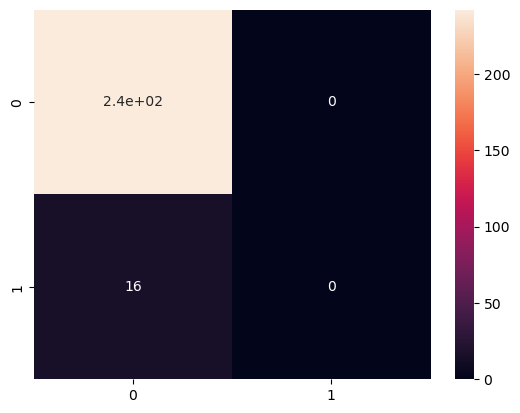

In [125]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True)

## Scaling for Random Forest 

In [181]:
df_scaled = df_rf.drop(columns=["DIED"])

In [182]:
df_scaled.shape

(2577, 7)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)

In [184]:
print(scaled_data)

[[ 1.20423026 -0.60714557 -0.20711739 ...  3.30811872  2.46384615
  -0.63962769]
 [-1.61622187 -0.60714557 -0.20711739 ... -0.44657053 -1.04698135
   1.18980688]
 [-0.34906222 -0.60714557 -0.20711739 ... -0.44657053  0.7084324
   1.18980688]
 ...
 [-0.02205328  1.34131537 -0.20711739 ...  1.4307741   0.7084324
  -0.63962769]
 [ 1.85824814  1.34131537 -0.20711739 ...  3.30811872  0.7084324
  -0.63962769]
 [ 0.50933626 -0.60714557 -0.20711739 ...  1.4307741   0.7084324
  -0.63962769]]


In [192]:
X2 = scaled_data
y2 = df_rf['DIED']

# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2,  random_state = 51)
X2.shape, X2.shape,X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((2577, 7), (2577, 7), (2061, 7), (516, 7), (2061,), (516,))

In [205]:
#Random Forest Classifier
clf_RF2 = RandomForestClassifier(n_estimators = 100, random_state = 51)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF2.fit(X2_train, y2_train)

# Make predictions on the test set
y_pred2 = clf_RF.predict(X2_test)

In [206]:
#Accuracy calculation
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y2_test, y_pred2)) )

Accuracy: 0.94


In [207]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(clf_RF, X2, y2, cv=5, scoring='accuracy')

print("Cross-validation scores: ", scores2)
print("Mean accuracy: ", scores2.mean())
print("Standard deviation:", scores2.std())

Cross-validation scores:  [0.94379845 0.94573643 0.93009709 0.90873786 0.91262136]
Mean accuracy:  0.9281982388801083
Standard deviation: 0.015335617755255614


In [208]:
from sklearn import metrics

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y2_test, y_pred2)) )
print( "precision: {:.2f}".format(metrics.precision_score(y2_test, y_pred2)) )
print( "recall: {:.2f}".format(metrics.recall_score(y2_test, y_pred2)) )

accuracy: 0.94
precision: 0.50
recall: 0.24


In [200]:
feature_imp = pd.Series(clf_RF.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Axes: >

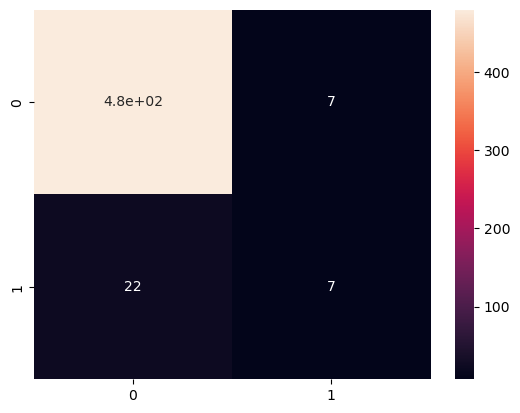

In [209]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y2_test, y_pred2)
sns.heatmap(cm, annot=True)

## PCA

In [ ]:
#X = df_rf.data
#y = df_rf.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
#pca = PCA(n_components = 2)

# transform data into the first two principal components
#X_pca = pca.fit_transform(X_scaled)

#print("Original shape: {}".format(str(X_scaled.shape)))
#print("Reduced shape: {}".format(str(X_pca.shape)))

## SMOTE 

In [130]:
df_oversamp = df_rf

In [161]:
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,0,0,0,0.0,2,2,0
1391,4,0,0,0,0.0,0,0,1
1392,35,0,0,0,0.0,0,1,1
1393,25,0,0,0,0.0,0,2,1
1394,37,1,0,0,1.0,0,0,1


In [164]:
df_rf["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [134]:
df_oversamp.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,0,0,0,0.0,2,2,0
1391,4,0,0,0,0.0,0,0,1
1392,35,0,0,0,0.0,0,1,1
1393,25,0,0,0,0.0,0,2,1
1394,37,1,0,0,1.0,0,0,1


In [137]:
X1 = df_oversamp[['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']]
y1 = df_oversamp['DIED']

In [138]:
from collections import Counter
original_class_distribution = Counter(y1)
print("Original Class Distribution:", original_class_distribution)

Original Class Distribution: Counter({0: 2422, 1: 155})


In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

In [167]:
oversampled_class_distribution = Counter(y1_resampled)
print("Oversampled Class Distribution:", oversampled_class_distribution)

Oversampled Class Distribution: Counter({0: 2422, 1: 2422})


In [168]:
X1_resampled_array = X1_resampled.values
y1_resampled_array = y1_resampled.values
y1_resampled_reshaped = y1_resampled_array.reshape(-1, 1)

In [169]:
resample_dataset = np.column_stack((X1_resampled_array, y1_resampled_reshaped))

Below is the array with the oversampling values. Now, I need to convert it into a DataFrame.

In [170]:
df_resample = pd.DataFrame(resample_dataset)

In [171]:
df_resample.head()

,0,1,2,3,4,5,6,7
0,73.0,0,0,0.0,2,2,0,0
1,4.0,0,0,0.0,0,0,1,0
2,35.0,0,0,0.0,0,1,1,0
3,25.0,0,0,0.0,0,2,1,0
4,37.0,1,0,1.0,0,0,1,0


Now, I need to bring the column's names to the dataset.

In [172]:
df_smote = pd.DataFrame(df_rf)
df1_resample = pd.DataFrame(df_resample)
df1_resample.columns = df_smote.columns
df1_resample.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
0,73.0,0,0,0.0,2,2,0,0
1,4.0,0,0,0.0,0,0,1,0
2,35.0,0,0,0.0,0,1,1,0
3,25.0,0,0,0.0,0,2,1,0
4,37.0,1,0,1.0,0,0,1,0


In [173]:
df1_resample.shape

(4844, 8)

In [174]:
df_rf["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [175]:
df1_resample["DIED"].value_counts()

0    4738
1     106
Name: DIED, dtype: int64

## SMOTE in Random forest

In [157]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics                           

In [158]:
X = df1_resample.drop('DIED', axis=1) 
y = df1_resample['DIED']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 51)
X.shape, X.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4844, 7), (4844, 7), (3875, 7), (969, 7), (3875,), (969,))

In [179]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [180]:
#Random Forest Classifier
clf_RF2 = RandomForestClassifier(n_estimators = 100, random_state = 23)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_RF.predict(X_test)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# ANN Model

## Pre-processing

### One-Hot Encode

This tool replaces categorical variables, like 'DIED' ('Y'= dead and 0 = alive), with one or more features with 0 and 1 values (Müller and Guido, 2017 p.214). I am using this tool because Machine Learning models are based on numerical operations and do not recognize stings. Because of this, it is necessary to convert strings into numbers without introducing ordinal relationships, as in the Label Encoding tool, which can give more weight to specific categories than others. 

First, I will use the value_counts function to check the contents of the columns where I want to proceed with the one-hot encoding. This is important because when humans input data, it is always possible to have some errors. There are no typos in the case of these columns, and then I can start the one-hot encoding process. Otherwise, I would have to convert all the typos into a unique word (Müller and Guido, 2017 p.214, 215).

In [52]:
df2["SEX"].value_counts()

F    1837
M     677
U      63
Name: SEX, dtype: int64

In [53]:
df2["DIED"].value_counts()

0    2422
Y     155
Name: DIED, dtype: int64

In [54]:
df2["DISABLE"].value_counts()

0    2471
Y     106
Name: DISABLE, dtype: int64

In [55]:
df2['CUR_ILL'].value_counts()

0    2096
Y     349
U     132
Name: CUR_ILL, dtype: int64

In [56]:
df2['HISTORY'].value_counts()

Y    1321
0    1148
U     108
Name: HISTORY, dtype: int64

In [57]:
df2['ALLERGIES'].value_counts()

0    1768
Y     717
U      92
Name: ALLERGIES, dtype: int64

In [58]:
feature_imp1 = pd.Series(clf_RF1.feature_importances_).sort_values(ascending = False)
feature_imp1

1    0.480614
2    0.263098
3    0.151366
0    0.104922
dtype: float64

From now on, the dataset will be called: **'df_encod'**

In [128]:
df_encod = pd.get_dummies(df2, columns=['SEX', 'DIED', 'DISABLE', 'CUR_ILL', 'HISTORY', 'ALLERGIES'])
df_encod.head()

,AGE_YRS,NUMDAYS,SEX_F,SEX_M,SEX_U,DIED_0,DIED_Y,DISABLE_0,DISABLE_Y,CUR_ILL_0,CUR_ILL_U,CUR_ILL_Y,HISTORY_0,HISTORY_U,HISTORY_Y,ALLERGIES_0,ALLERGIES_U,ALLERGIES_Y
1390,73,0.0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1391,4,0.0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1392,35,0.0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
1393,25,0.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1394,37,1.0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1


#### Sparsity

Sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. Sparse datasets are characterized by most features having 0 most of the time (Müller and Guido, 2017 p.44). I am doing it because it guides me about what normalization or scaling feature I will use before applying the ML models.

In [60]:
missing_values = df_encod.isnull().sum().sum()
zero_values = (df_encod == 0).sum().sum()

total_data_points = df_encod.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.2f}")
print("Missing values:", missing_values)
print("zero values:", zero_values)

Sparsity of the dataset: 0.59
Missing values: 0
zero values: 27216


The sparsity values must be between 0 and 1, where 0 indicates no sparsity, and 1 indicates wholly spaced. The result for this dataset was found to be 0.59, meaning that 59% of the dataset is sparse and has a significant portion of zero values. However, it was expected because that is usually a consequence of the One-hot encodes; knowing it, I will be able to use the l-normalization in the data.

However, I will experiment with the models without normalization and with L1 and L2 normalizations to evaluate which is beneficial to improving the model's performance.

### Data without normalization:

### Data with L1-normalization:

### Data with L2-normalization:

### Reference

Scikit-learn.org. (2012). 3.2. Tuning the hyper-parameters of an estimator — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/grid_search.html [Accessed 19 Nov. 2023].

Müller, A. C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. 1st ed. United States of America. O’reilly Media.

